This notebook is used to figure out the right values for the logistic growth curve that describes how quickly we can build seaweed farms in a nuclear winter. 

In [1]:
import math
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)
np.random.seed(42)

plt.style.use(
    "https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle"
)

In [2]:
def logistic_curve(x, max_L, k, x0, off):
    """
    Describes a logistic growth curve
    see for example:
    https://stackoverflow.com/questions/60160803/scipy-optimize-curve-fit-for-logistic-function
    Arguments:
        x: value to calculate
        max_L: maximum value of the curve
        k: the logistic growth rate
        x0: the sigmoid's midpoint
        off: offset to 0
    Returns
        float: y value corresponding to x
    """
    return max_L / (1 + np.exp( - k * (x - x0))) + off

In [11]:
# Data
x = [0,1, 45, 90] # days
y = [0,1, 2000, 4000] # amount farms build km²

In [12]:
popt, _ = curve_fit(logistic_curve, x,y, p0=[4000, 1, 50, 50])
popt

/home/florian/local/anaconda3/envs/seaweed-growth-model/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([ 4.01307030e+03,  1.42633035e-01,  4.50000000e+01, -6.53515132e+00])

In [13]:
x_sim = np.linspace(0,100,10000)
y_sim = [logistic_curve(i, popt[0], popt[1], popt[2], popt[3]) for i in x_sim]

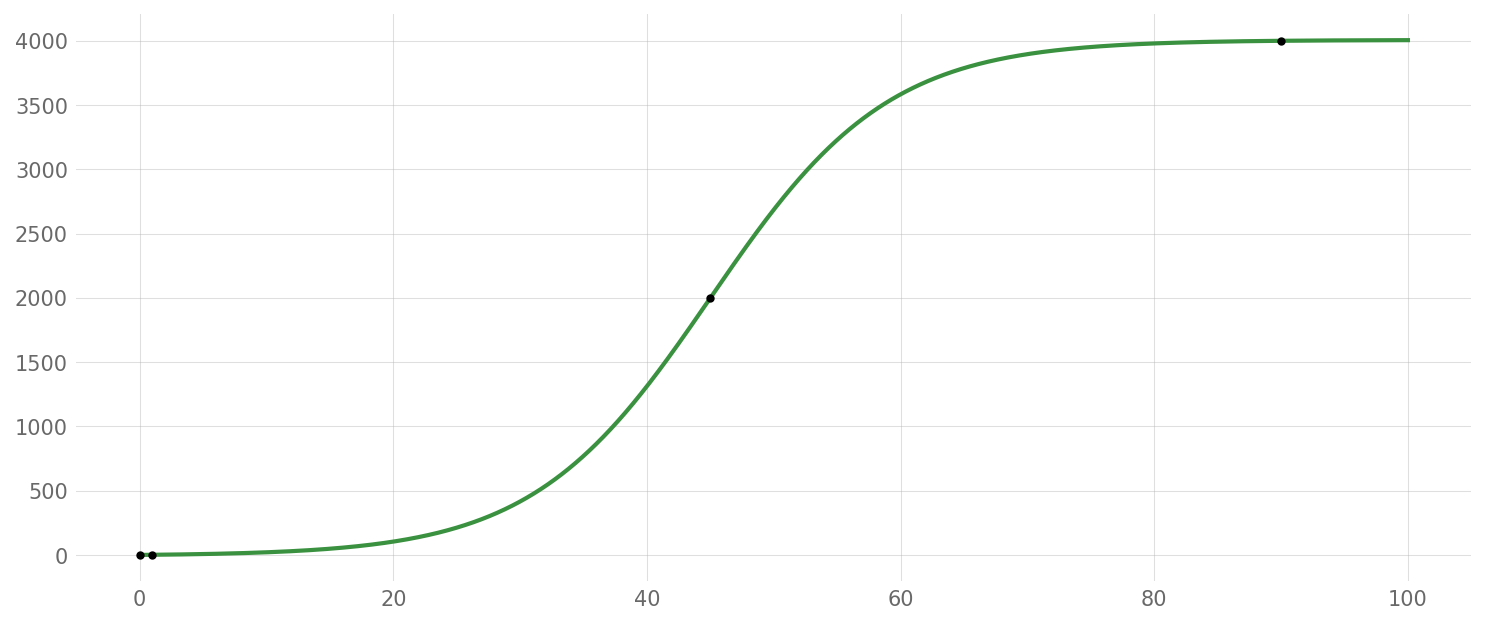

In [14]:
plt.plot(x_sim, y_sim)
plt.scatter(x,y, color="black", zorder=5)